## Улучшение качества модели

1. Работаем с данными.
2. Подбираем алгоритм.
3. Настраиваем гиперпараметры.


I. Работа с данными.
1. Получить больше данных. 
2. Обработка данных.
3. Балансировка классов.
4. Придумать больше данных.

II. Работа с алгоритмами.
1. Усложнение при недообучении.
2. Упрощение и регуляризация при переобучении.
3. Настройка гиперпараметров
4. Построение ансамбля моделей

III. Переосмыслить проблему



https://www.machinelearningmastery.ru/improve-deep-learning-performance/






# Подбор параметров

Задача: получить набор гиперпараметров для максимального качества 


$ argmax_{\theta}(argmax_{\omega} f({\theta,\omega}))$



Подходы:

1. Ручной выбор - на основе своей экспертной оценки вы выбираете гиперпарметры модели
2. Поиск по сетке - перебор всех вариантов
3. Случайный выбор - проверяются случайные семплы из пространства гиперпарметров
4. Байесовская оптимизация - применяется семплирование из пространства гиперпараметров. На основе результатов обучения модели с наборами гиперпараметров строиться вероятностная функция отображения из значений гиперпараметра в целевую функцию, которая позволяет более адресно семплировать из пространства гипермпараметров в области максимума.
5. Генетические алгоритмы - применяются эволюционные алгоритмы с мутациями и скрещиванием


## Кросс-валидация

 ## Оценка параметров модели
 Нам нужно как-то оценивать качество создаваемых нами моделей. Идея тренировать и тестировать модели на одних и тех же данных - плохая (модели будут переобучаться).

Решение этой проблемы номер 1:

* Разделять данные на 2 группы: для обучения и тестирования

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

#from jupyterthemes import jtplot
#jtplot.style()

In [ ]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

# Практика. Сделайте 20 разных train_test_split и обучите на них KNN-классификатор. Оцените качество на тестовой выборке

In [ ]:
for i in range(20):
    X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, random_seed=i)
    knn = KNeighborsClassifier().fit(X_tr, y_tr)
    print(knn.score(X_ts, y_ts))

0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9210526315789473
0.9210526315789473
0.9473684210526315
0.9473684210526315
0.9736842105263158
0.9736842105263158
0.9210526315789473
0.9473684210526315
0.9736842105263158
0.9473684210526315
1.0
0.9473684210526315
0.9473684210526315
0.9736842105263158
1.0
0.9736842105263158
0.9736842105263158


## Конец практики

**Проблема** - качество модели имеет высокую дисперсию (high variance), т.к. примеры и в тестовой и в обучающей выборке могут значимо повлиять на полученную оценку

Решение - разобъем нашу выборку на несколько групп. Одну используем для теста, на остальных обучаем. После чего меняем группу для теста и повторяем. Усредняем полученное качество на каждой из выборок для оценки итогового качества модели


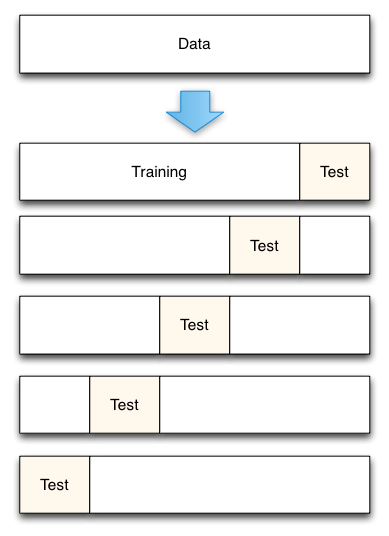

## Практика. Сделайте cross_val_score для KNN

In [ ]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring="accuracy")
print(scores)
print(scores.mean())

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
0.9666666666666668


In [ ]:
!pip show numpy

Name: numpy
Version: 1.21.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: yellowbrick, xgboost, xarray, wordcloud, torchvision, torchtext, tifffile, thinc, Theano-PyMC, tensorflow, tensorflow-probability, tensorflow-hub, tensorflow-datasets, tensorboard, tables, statsmodels, spacy, sklearn-pandas, seaborn, scs, scipy, scikit-learn, scikit-image, resampy, qdldl, PyWavelets, python-louvain, pystan, pysndfile, pymc3, pyerfa, pyemd, pycocotools, pyarrow, plotnine, patsy, pandas, osqp, opt-einsum, opencv-python, opencv-contrib-python, numexpr, numba, nibabel, netCDF4, moviepy, mlxtend, mizani, missingno, matplotlib, matplotlib-venn, lightgbm, librosa, Keras-Preprocessing, kapre, jpeg4py, jaxlib, jax, imgaug, imbalanced-learn, imageio, hyperopt, holoviews, h5py, gym, gensim, folium, fix-yahoo-f

In [ ]:
pip install optuna -q

     |████████████████████████████████| 308 kB 11.6 MB/s 
     |████████████████████████████████| 210 kB 30.2 MB/s 
     |████████████████████████████████| 81 kB 3.3 MB/s 
     |████████████████████████████████| 78 kB 4.2 MB/s 
     |████████████████████████████████| 150 kB 45.1 MB/s 
     |████████████████████████████████| 49 kB 4.7 MB/s 
     |████████████████████████████████| 113 kB 42.2 MB/s 


In [ ]:
! ls -al

total 16
drwxr-xr-x 1 root root 4096 Apr  8 13:32 .
drwxr-xr-x 1 root root 4096 Apr 11 18:13 ..
drwxr-xr-x 4 root root 4096 Apr  8 13:31 .config
drwxr-xr-x 1 root root 4096 Apr  8 13:32 sample_data


## Конец практики

# Подбор оптимального количестов соседей через CrossValidationScore

## Практика. Подберите оптимальное количество соседей на основе cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score
for i in list(range(1,30)):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X, y, cv=10, scoring="accuracy")
    print(i, ':', scores.mean(),  scores.std())

1 : 0.96 0.05333333333333332
2 : 0.9533333333333334 0.052068331172711015
3 : 0.9666666666666666 0.04472135954999579
4 : 0.9666666666666666 0.04472135954999579
5 : 0.9666666666666668 0.04472135954999579
6 : 0.9666666666666668 0.04472135954999579
7 : 0.9666666666666668 0.04472135954999579
8 : 0.9666666666666668 0.04472135954999579
9 : 0.9733333333333334 0.03265986323710904
10 : 0.9666666666666668 0.04472135954999579
11 : 0.9666666666666668 0.04472135954999579
12 : 0.9733333333333334 0.03265986323710904
13 : 0.9800000000000001 0.030550504633038926
14 : 0.9733333333333334 0.04422166387140532
15 : 0.9733333333333334 0.03265986323710904
16 : 0.9733333333333334 0.03265986323710904
17 : 0.9733333333333334 0.03265986323710904
18 : 0.9800000000000001 0.030550504633038926
19 : 0.9733333333333334 0.03265986323710904
20 : 0.9800000000000001 0.030550504633038926
21 : 0.9666666666666666 0.033333333333333326
22 : 0.9666666666666666 0.033333333333333326
23 : 0.9733333333333334 0.03265986323710904
24 : 

## Конец практики

## GridSearchCV
В некоторым смысле - эта функция более продвинутая версия цикла for, описанного выше

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [ ]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
param_grid = {'n_neighbors':k_range}
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [ ]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

Полученный объект будет перебирать параметр "количество соседей" у KNN, делать кросс-валидацию и оценивать качество, используя accuracy в качестве метрики.
n_jobs=-1 заставляет параллелить вычисления по всем ядрам вашего компьютера

In [ ]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=29, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
# view the complete results (list of named tuples)
for k in grid.cv_results_:
    print(k, ":", grid.cv_results_[k][0])
    break

mean_fit_time : 0.0006326436996459961
std_fit_time : 0.00022433172032990662
mean_score_time : 0.0018276691436767579
std_score_time : 0.0005959263279994321
param_n_neighbors : 1
params : {'n_neighbors': 1}
split0_test_score : 1.0
split1_test_score : 0.9333333333333333
split2_test_score : 1.0
split3_test_score : 0.9333333333333333
split4_test_score : 0.8666666666666667
split5_test_score : 1.0
split6_test_score : 0.8666666666666667
split7_test_score : 1.0
split8_test_score : 1.0
split9_test_score : 1.0
mean_test_score : 0.96
std_test_score : 0.05333333333333332
rank_test_score : 24


In [ ]:
# create a list of the mean scores only
test_scores = grid.cv_results_['mean_test_score']
print(test_scores)

[0.96       0.95333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.97333333 0.96666667 0.96666667 0.97333333
 0.98       0.97333333 0.97333333 0.97333333 0.97333333 0.98
 0.97333333 0.98       0.96666667 0.96666667 0.97333333 0.96
 0.96666667 0.96       0.96666667 0.95333333 0.95333333 0.95333333]


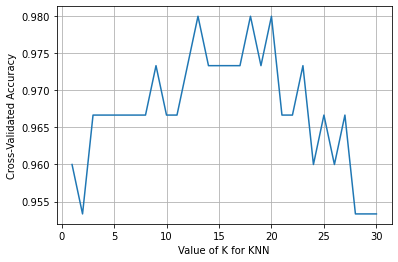

In [ ]:
# plot the results
# this is identical to the one we generated above
plt.plot(k_range, test_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.grid()

In [ ]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.9800000000000001
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')


In [ ]:
from sklearn.metrics import confusion_matrix
pred = grid.best_estimator_.predict(X)
c_m = confusion_matrix(y, pred)
c_m

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])

## Перебор нескольких параметров одновременно

## Практика. Переберите параметры k (количество соседей) и weight (тип весов) одновременно

In [ ]:
%%time

param_grid = {'n_neighbors':list(range(1,30)),
              'weights': ['uniform', 'distance']
}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

grid.fit(X,y)


CPU times: user 1.25 s, sys: 4.92 ms, total: 1.26 s
Wall time: 1.27 s


In [ ]:
print(grid.best_score_)
print(grid.best_estimator_)

0.9800000000000001
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')


## Конец практики

## RandomizedSearch
GridSearch просто перебирает все параметры. Он, конечно, найдет их самое оптимальное значение, но вопрос во времени. Итоговое количество комбинаций для GridSearchCV - $N_1*N_2*N_3 * ... * N_K$, где $N_i$ - количество возможных значений $i$-го параметра

RandomizedSearchCV - выбирает случайные значения из параметров и пробует запускать обучение с ними. Можно попробовать "пристреляться" к оптимальным значениям, а затем запустить GridSearch для уточнения

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

## Практика. Переберите параметры k (количество соседей) и weight (количество весов) одновременно при помощи RandomizedSearchCV

In [ ]:
%%time
param_grid = {'n_neighbors':list(range(1,30)),
              'weights': ['uniform', 'distance']
}
knn = KNeighborsClassifier()
grid = RandomizedSearchCV(knn, param_grid, cv=10, scoring='accuracy')

grid.fit(X,y)


CPU times: user 222 ms, sys: 1.76 ms, total: 223 ms
Wall time: 225 ms


In [ ]:
print(grid.best_score_)
print(grid.best_estimator_)

0.9733333333333334
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')


## Конец практики

# Практическая часть

In [ ]:
from sklearn.datasets import load_digits
import numpy as np

In [ ]:
data = load_digits()

In [ ]:
X, y = data['data'], data['target']

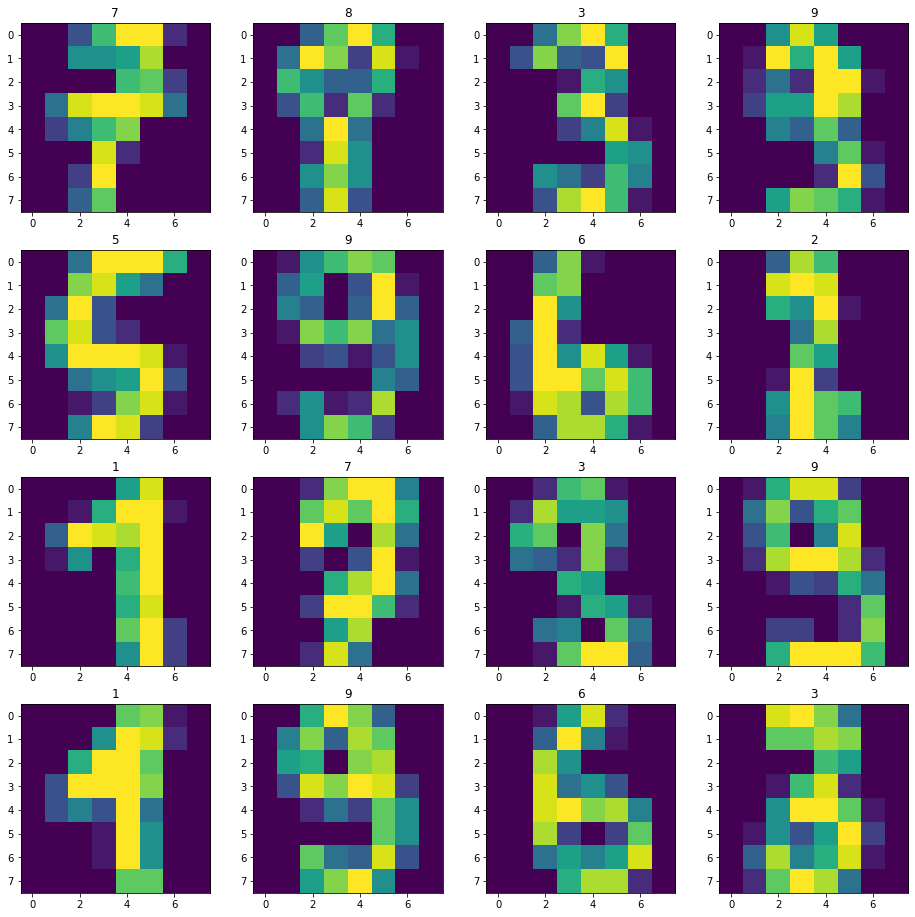

In [ ]:
fig = plt.figure(figsize=(16,16))
for i in range(0, 4):
    for j in range(0,4):
        img = np.random.choice(len(X))
        plt.subplot(4, 4, i * 4 + j + 1)
        plt.imshow(X[img].reshape(8, 8))
        plt.title(y[img])
plt.show()


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [ ]:
x = [0,0,0,50,200,50,0,0,0,0,45,15,39,0,0,0,0, ...]
y = 1

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

# Практика. Возьмите 5 любых классификатор, подберите для них параметры и сравните итоговое качество на отложенной выборке

In [ ]:
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import uniform    

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
models=[
      {'name':'NB',"model":BernoulliNB(), 'params':{'alpha': uniform(loc=0, scale=4)}},  
      {'name':'Lr',"model": LogisticRegression()  , 'params':{'C':[0.1,0.2,0.3,0.5,0.7,1], 'penalty':['l1', 'l2']}},
      {'name':'R',"model": Ridge(), 'params':{'alpha': uniform(loc=0, scale=4), 'solver':['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}},
      {'name':'SVC',"model": SVC(), 'params':{'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'gamma':['scale', 'auto']}},
      {'name':'RF',"model": RandomForestClassifier(), 'params':{'n_estimators':[10,25,50,100,150,200], 'criterion':['gini', 'entropy'], 'max_depth':[3,5,7,9,11]}},
      {'name':'KN',"model": KNeighborsClassifier(), 'params':{'n_neighbors':list(range(1,30)),'weights': ['uniform', 'distance'], 'p':[1,2,3]}},
      {'name':'DT',"model": DecisionTreeClassifier(), 'params':{'criterion':['gini', 'entropy'], 'max_depth':[3,5,7,9,11]}}

]

res=[]
for v in  models:
    res.append((v['name'], RandomizedSearchCV(v['model'], v['params'], cv=10).fit(X_train, y_train)))

In [ ]:
for r in res:
    print(r[0], r[1].best_score_, r[1].best_params_)

NB 0.8935266122766123 {'alpha': 0.01947059145844454}
Lr 0.964500777000777 {'penalty': 'l2', 'C': 0.5}
R 0.5544903101604503 {'alpha': 3.3602824688164303, 'solver': 'sag'}
SVC 0.9749320124320124 {'kernel': 'rbf', 'gamma': 'auto'}
RF 0.9735528360528359 {'n_estimators': 100, 'max_depth': 11, 'criterion': 'gini'}
KN 0.9777000777000776 {'weights': 'uniform', 'p': 2, 'n_neighbors': 5}
DT 0.8476058663558664 {'max_depth': 11, 'criterion': 'entropy'}


In [ ]:
y_pred = res[5][1].best_estimator_.predict(X_valid)
wrong = y_pred != y_valid

X_wrong, y_wrong, y_true_wrong = X_valid[wrong], y_pred[wrong], y_valid[wrong] 

In [ ]:
y_true_wrong

array([2, 2, 4, 8, 8, 4, 9, 7, 7, 9])

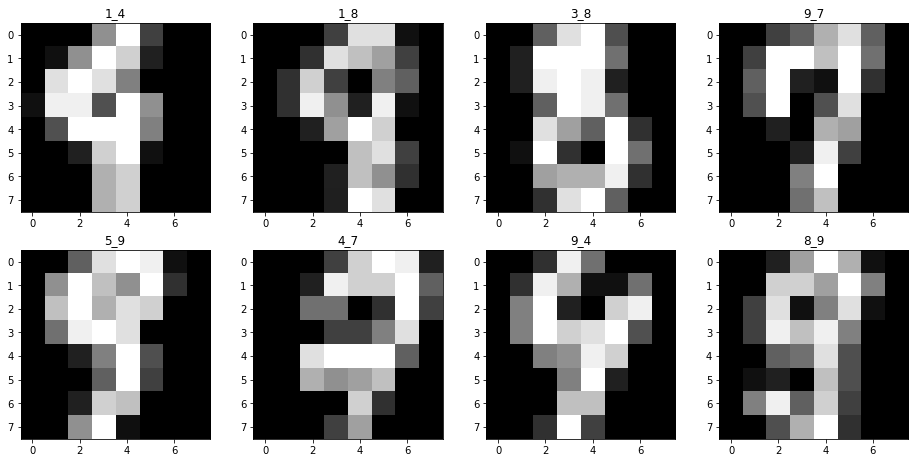

In [ ]:
X_wrong = sc.inverse_transform(X_wrong)

fig = plt.figure(figsize=(16,16))
imgs = np.random.choice(len(X_wrong), 8, replace=False)

for i in range(2):
    for j in range(4):
        img = imgs[i*4+j]
        plt.subplot(4,4,i*4+j+1)
        plt.imshow(X_wrong[img].reshape(8,8), cmap='gray')
        plt.title(str(y_wrong[img])+'_'+str(y_true_wrong[img])) 
plt.show()

# Конец практики

## Байесовская Оптимизация

Байесовская оптимизация основана на теореме Байеса

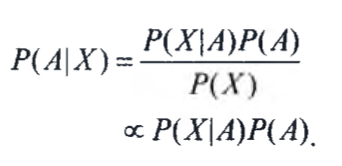

Значения гиперпараметров в текущей итерации выбираются с учётом результатов на предыдущем шаге. Основная идея алгоритма заключается в следующем – на каждой итерации подбора находится компромисс между исследованием регионов с самыми удачными из найденных комбинаций гиперпараметров и исследованием регионов с большой неопределённостью (где могут находиться ещё более удачные комбинации). Это позволяет во многих случаях найти лучшие значения параметров модели за меньшее количество времени.

Байесовская Оптимизация

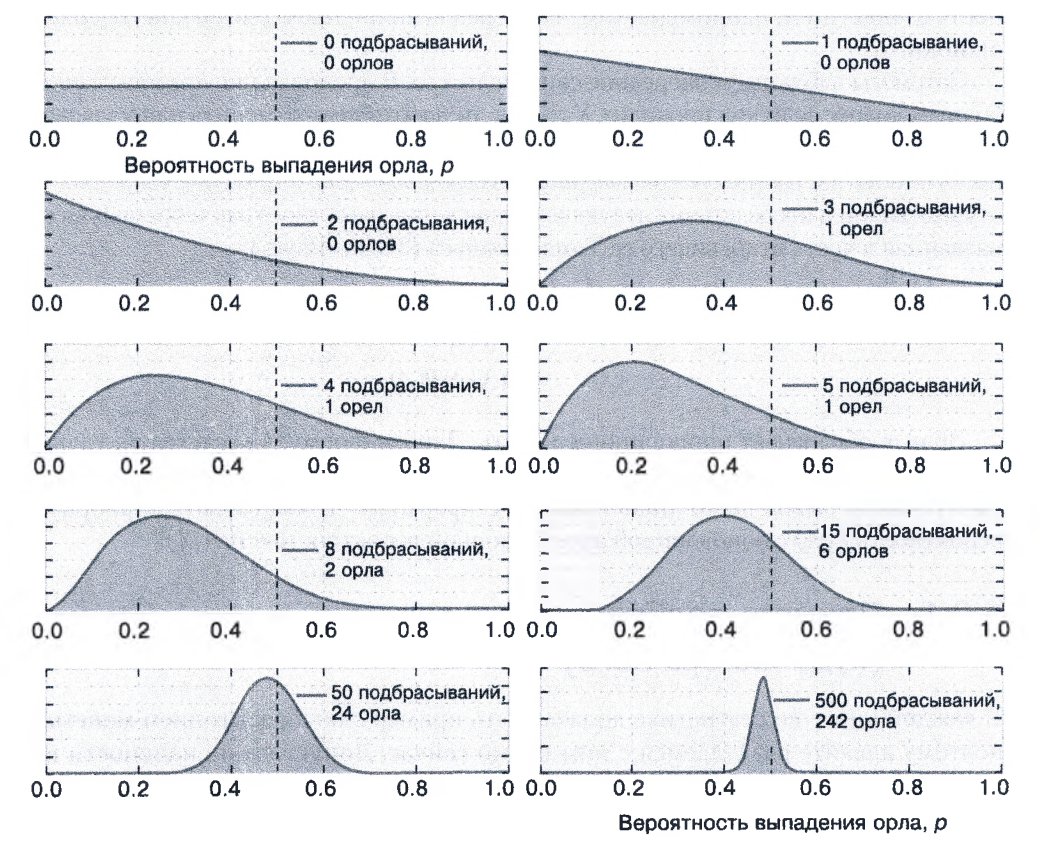

In [ ]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

In [ ]:
search_space = [
    hp.choice(label='n_neighbors', options=list(range(1,30))),
    hp.choice(label='weights', options=['uniform', 'distance']),
    hp.choice(label='p', options=[1,2,3,4,5]),           
]
                

In [ ]:
from hyperopt.pyll.stochastic import sample


samples = []

# Sample 10000 values from the range
for _ in range(10):
    print(sample(search_space))

(10, 'distance', 1)
(17, 'distance', 5)
(9, 'distance', 1)
(16, 'uniform', 3)
(16, 'distance', 3)
(6, 'distance', 3)
(15, 'distance', 3)
(29, 'uniform', 4)
(20, 'uniform', 3)
(25, 'distance', 3)


In [ ]:
def objective(params):
  knn = KNeighborsClassifier(n_neighbors=params[0], weights=params[1], p=params[2])
  scores = cross_val_score(knn, X, y, cv=10, scoring="accuracy")
  return -scores.mean()


In [ ]:
from hyperopt import rand, tpe
from hyperopt import Trials

# Create the algorithms
tpe_algo = tpe.suggest
rand_algo = rand.suggest
# Create two trials objects
tpe_trials = Trials()
rand_trials = Trials()

In [ ]:
from hyperopt import fmin

tpe_best = fmin(fn=objective, space=search_space, algo=tpe_algo, trials=tpe_trials, 
                max_evals=25)

100%|██████████| 25/25 [01:59<00:00,  4.79s/it, best loss: -0.9760769708255742]


In [ ]:
print(tpe_best)

{'n_neighbors': 1, 'p': 3, 'weights': 1}


In [ ]:
# Run 25 evals with the random algorithm
rand_best = fmin(fn=objective, space=search_space, algo=rand_algo, trials=rand_trials, 
                 max_evals=25, rstate= np.random.RandomState(50))

100%|██████████| 25/25 [02:14<00:00,  5.37s/it, best loss: -0.9749627560521414]


In [ ]:
print(rand_best)

{'n_neighbors': 1, 'p': 1, 'weights': 1}


https://github.com/hyperopt/hyperopt


https://habr.com/ru/company/antiplagiat/blog/528384/

In [ ]:
pip install optuna -q

In [ ]:
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler, CmaEsSampler

In [ ]:
n_est = [500, 800, 1000]
max_dep = [3,5, 7]
lr  = [0.01, 0.02, 0.03, 0.05]
reg_lambda = [5, 7, 10, 15]

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split 

In [ ]:
from sklearn.datasets import fetch_20newsgroups_vectorized

In [ ]:
n_samples = 2000
X, y = fetch_20newsgroups_vectorized(subset='all', return_X_y=True)
X = X[:n_samples]
y = y[:n_samples]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,stratify=y,test_size=0.1)

In [ ]:
y.max()

19

In [ ]:
def scorer(model, X,y):
    return f1_score(y, model.predict(X), average='weighted')

In [ ]:
import lightgbm as lgb
def objective(trial: Trial,X,y) -> float:

    train_data = lgb.Dataset(X, label=y)
    param = {
                "n_estimators" : trial.suggest_int('n_estimators', 400, 1000, 300),
                'max_depth':trial.suggest_int('max_depth', 1, 11, 2),
                'learning_rate':trial.suggest_loguniform('learning_rate',0.05,1),
                'metric': 'multi_logloss',
                'objective': 'multiclass',
                'num_class': 20,
                #'class_weight': 'balanced',
                'n_jobs' : -1,
                'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 10.0),
                'num_leaves': trial.suggest_int('num_leaves', 2, 256),
                'colsample_bytree': trial.suggest_uniform('feature_fraction', 0.3, 1.0),
                'subsample': trial.suggest_uniform('bagging_fraction', 0.3, 1.0),
            }
   
    model = lgb.LGBMClassifier(**param)
    return  cross_val_score(model, X, y, scoring = scorer, cv=3).mean()

In [ ]:
%%time
study = optuna.create_study(direction='maximize',sampler=TPESampler())
study.optimize(lambda trial : objective(trial,X_train,y_train),n_trials= 50)

[I 2021-07-30 18:42:28,763] A new study created in memory with name: no-name-3c74e4c6-c803-4b0d-94c0-52fcdf69f54f
[I 2021-07-30 18:46:40,453] Trial 0 finished with value: 0.5886207585726324 and parameters: {'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.0686325201555245, 'reg_lambda': 6.520376322803206e-05, 'num_leaves': 246, 'feature_fraction': 0.41823531472134423, 'bagging_fraction': 0.30016662863665167}. Best is trial 0 with value: 0.5886207585726324.
[I 2021-07-30 18:48:45,354] Trial 1 finished with value: 0.5914384526063173 and parameters: {'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.11813797238881246, 'reg_lambda': 5.190047759484598e-07, 'num_leaves': 24, 'feature_fraction': 0.5971544313271198, 'bagging_fraction': 0.906007634882442}. Best is trial 1 with value: 0.5914384526063173.
[I 2021-07-30 18:49:17,045] Trial 2 finished with value: 0.5794945795087659 and parameters: {'n_estimators': 400, 'max_depth': 1, 'learning_rate': 0.22708171968045127, 'reg_lambda'

CPU times: user 5h 36min 50s, sys: 3min 25s, total: 5h 40min 16s
Wall time: 2h 53min 55s


In [ ]:
print('Best trial: score {},\nparams {}'.format(study.best_trial.value,study.best_trial.params))

Best trial: score 0.6163725749772664,
params {'n_estimators': 700, 'max_depth': 11, 'learning_rate': 0.15969878578534794, 'reg_lambda': 0.07907611307987321, 'num_leaves': 208, 'feature_fraction': 0.3798227698731621, 'bagging_fraction': 0.8081590629892836}


## OOB Score

Напомним идею беггинга - выборка с повторением элементов из обучающего множества и обучение на этой выборке.
OOB-оценка - это оценка, когда для каждого $x_i$, используются только те классификаторы, которые до этого не видели $x_i$ в качестве обучающего примера

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import uniform

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
classifier = RandomForestClassifier(oob_score=True, n_estimators=20, max_depth=5)

In [ ]:
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print(classifier.oob_score_)
print(classifier.score(X_test,y_test))

0.9107142857142857
0.9736842105263158


OOB-score позволяет не делать отдельный validation dataset, но обычно приводит к недооценке реального качества

# Домашняя работа
Взять boston house-prices datase (sklearn.datasets.load_boston). Возмите 7 любых  регрессоров (попробовать разные алгоритмы, поподбирать параметры, вывести итоговое качество).